<div style="text-align: center;"> Data Mining - </div> 

<div style="text-align: center;"> By: The Threelancers</div>

<div style="text-align: center;" ><a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a></div>

# Data Exploration & Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Binarizer, OneHotEncoder, OrdinalEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway
from sklearn.impute import SimpleImputer
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway


### Loading the CSV file

In [4]:
freeLancerData = pd.read_csv('Dataset/Final_Upwork_Dataset.csv')

### Display a few samples of the Free Lancer dataset

In [5]:
freeLancerData.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,...,United States,6.0,12.0,NaN,0.0,Fixed-price,"$2,500",NaN,0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,...,Canada,4.0,8.0,5.000000,1.0,Fixed-price,$200,NaN,0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,...,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,$40.00,40,NaN
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,...,Canada,6.0,12.0,4.935536,26.0,Hourly,NaN,$35.00-$100.00,$35.00,$100.00
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,...,United States,6.0,12.0,4.942242,12512.0,Hourly,NaN,NaN,0,NaN


### Display the number of Features & Samples

In [6]:
freeLancerData.shape

(63950, 41)

### Datatypes of the Freelancer Dataset 

In [7]:
print(freeLancerData.dtypes)

Job Title                object
Job_URL                  object
EX_level_demand          object
Time_Limitation          object
Search_Keyword           object
Posted_from              object
Description              object
Category1_URL_search     object
Category_1               object
highlight                object
Category2_URL_search     object
Category_2               object
Category3_URL_search     object
Category_3               object
Category4_URL_search     object
Category_4               object
Category5_URL_search     object
Category_5               object
Category6_URL_search     object
Category_6               object
Category7_URL_search     object
Category_7               object
Category8_URL_search     object
Category_8               object
Category9_URL_search     object
Category_9               object
Applicants_Num           object
Payment_Situation        object
Enterprise_Client        object
Freelancers_Num           int64
Spent($)                float64
Client_C

### Statistics of the Free Lancer Dataset

In [8]:
freeLancerData.describe()

,Freelancers_Num,Spent($),Connects_Num,New_Connects_Num,Rating,Feedback_Num
count,63950.000000,6.230400e+04,63949.000000,63949.000000,30593.000000,63949.000000
mean,1.137654,2.999789e+04,4.506701,9.013401,4.823875,20.997029
std,2.391479,3.926514e+05,2.097518,4.195035,0.418398,180.450288
min,0.000000,0.000000e+00,1.000000,2.000000,1.000000,0.000000
25%,1.000000,0.000000e+00,2.000000,4.000000,4.842153,0.000000
50%,1.000000,8.000000e+01,4.000000,8.000000,4.975717,0.000000
75%,1.000000,4.000000e+03,6.000000,12.000000,5.000000,10.000000
max,99.000000,7.000000e+07,8.000000,16.000000,5.000000,12541.000000


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway

# Load your dataset

# Step 1: Define attribute types and check for missing values
data_types = {
    "Job Title": "Categorical (Nominal)",
    "Job_URL": "Categorical (Nominal)",
    "EX_level_demand": "Categorical (Ordinal)",
    "Time_Limitation": "Categorical (Nominal)",
    "Search_Keyword": "Categorical (Nominal)",
    "Posted_from": "Categorical (Nominal)",
    "Description": "Categorical (Nominal)",
    "Category_1": "Categorical (Nominal)",
    "highlight": "Categorical (Nominal)",
    "Applicants_Num": "Numerical (Discrete, Ratio)",
    "Payment_Situation": "Categorical (Nominal)",
    "Enterprise_Client": "Categorical (Nominal)",
    "Freelancers_Num": "Numerical (Discrete, Ratio)",
    "Spent($)": "Numerical (Continuous, Ratio)",
    "Client_Country": "Categorical (Nominal)",
    "Connects_Num": "Numerical (Discrete, Ratio)",
    "New_Connects_Num": "Numerical (Discrete, Ratio)",
    "Rating": "Numerical (Continuous, Ratio)",
    "Feedback_Num": "Numerical (Discrete, Ratio)",
    "Payment_type": "Categorical (Nominal)",
    "Job_Cost": "Numerical (Continuous, Ratio)",
    "Hourly_Rate": "Numerical (Continuous, Ratio)",
    "Start_rate": "Numerical (Continuous, Ratio)",
    "End_rate": "Numerical (Continuous, Ratio)"
}

# Convert columns identified as numerical to numeric data type, coercing errors to NaN
for col in data_types:
    if 'Numerical' in data_types[col]:
        freeLancerData[col] = pd.to_numeric(freeLancerData[col], errors='coerce')

# Check for missing values
missing_values = freeLancerData.isnull().sum()
print("Missing Values:")
print(missing_values)

# Separate columns by type
numerical_columns = [col for col, dtype in data_types.items() if 'Numerical' in dtype]
categorical_columns = [col for col, dtype in data_types.items() if 'Categorical' in dtype]

# Step 2: Calculate correlations between all features
correlation_data = {
    'Feature Pair': [],
    'Correlation Method': [],
    'Correlation Value': []
}

# Numerical vs Numerical (Pearson and Spearman)
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1, col2 = numerical_columns[i], numerical_columns[j]
        # Drop any rows with NaN values in these two columns for correlation calculation
        valid_data = freeLancerData[[col1, col2]].dropna()
        if not valid_data.empty:
            pearson_corr, _ = pearsonr(valid_data[col1], valid_data[col2])
            spearman_corr, _ = spearmanr(valid_data[col1], valid_data[col2])

            correlation_data['Feature Pair'].append(f"{col1} vs {col2}")
            correlation_data['Correlation Method'].append("Pearson")
            correlation_data['Correlation Value'].append(pearson_corr)
            
            correlation_data['Feature Pair'].append(f"{col1} vs {col2}")
            correlation_data['Correlation Method'].append("Spearman")
            correlation_data['Correlation Value'].append(spearman_corr)

# Numerical vs Categorical (ANOVA and Point-Biserial)
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        if freeLancerData[cat_col].nunique() == 2:  # Point-Biserial
            categories = freeLancerData[cat_col].dropna().unique()
            mask = freeLancerData[cat_col] == categories[0]
            point_biserial_corr, _ = pointbiserialr(mask.astype(int), freeLancerData[num_col].fillna(0))
            correlation_data['Feature Pair'].append(f"{num_col} vs {cat_col}")
            correlation_data['Correlation Method'].append("Point-Biserial")
            correlation_data['Correlation Value'].append(point_biserial_corr)
        else:  # ANOVA
            groups = [freeLancerData[num_col][freeLancerData[cat_col] == category].dropna() for category in freeLancerData[cat_col].unique()]
            if len(groups) > 1:
                anova_stat, _ = f_oneway(*groups)
                correlation_data['Feature Pair'].append(f"{num_col} vs {cat_col}")
                correlation_data['Correlation Method'].append("ANOVA")
                correlation_data['Correlation Value'].append(anova_stat)

# Categorical vs Categorical (Chi-Square)
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        cat1, cat2 = categorical_columns[i], categorical_columns[j]
        contingency_table = pd.crosstab(freeLancerData[cat1].fillna('Unknown'), freeLancerData[cat2].fillna('Unknown'))
        chi2_stat, _, _, _ = chi2_contingency(contingency_table)
        
        correlation_data['Feature Pair'].append(f"{cat1} vs {cat2}")
        correlation_data['Correlation Method'].append("Chi-Square")
        correlation_data['Correlation Value'].append(chi2_stat)

# Convert to DataFrame and display
correlation_df = pd.DataFrame(correlation_data)
print(correlation_df)


Missing Values:
Job Title                   2
Job_URL                     1
EX_level_demand          7015
Time_Limitation         40916
Search_Keyword              1
Posted_from                37
Description                 2
Category1_URL_search      445
Category_1                445
highlight               13819
Category2_URL_search     4061
Category_2               4061
Category3_URL_search     8953
Category_3               8953
Category4_URL_search    16407
Category_4              16407
Category5_URL_search    24372
Category_5              24372
Category6_URL_search    32643
Category_6              32643
Category7_URL_search    38758
Category_7              38758
Category8_URL_search    43514
Category_8              43514
Category9_URL_search    47469
Category_9              47469
Applicants_Num          63950
Payment_Situation           1
Enterprise_Client       63897
Freelancers_Num             0
Spent($)                 1646
Client_Country            125
Connects_Num            

/var/folders/zt/c190v41j403gszjzbfzh1hdh0000gp/T/ipykernel_21837/342175470.py:62: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = pearsonr(valid_data[col1], valid_data[col2])
/var/folders/zt/c190v41j403gszjzbfzh1hdh0000gp/T/ipykernel_21837/342175470.py:63: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(valid_data[col1], valid_data[col2])
/var/folders/zt/c190v41j403gszjzbfzh1hdh0000gp/T/ipykernel_21837/342175470.py:86: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_stat, _ = f_oneway(*groups)


# Visualization of Attributes

## Visualizing Numerical Attributes - Histograms

In [2]:
def visualize_numerical_feature(feature):
    sns.histplot(freeLancerData[feature], kde=True)
    plt.title("{} Distribution".format(feature))
    plt.show()

    print(
        'mean: ', freeLancerData[feature].mean(), 
        ', median: ', freeLancerData[feature].median(), 
        ', range: ', freeLancerData[feature].max() - freeLancerData[feature].min()
    )

### Age Histogram

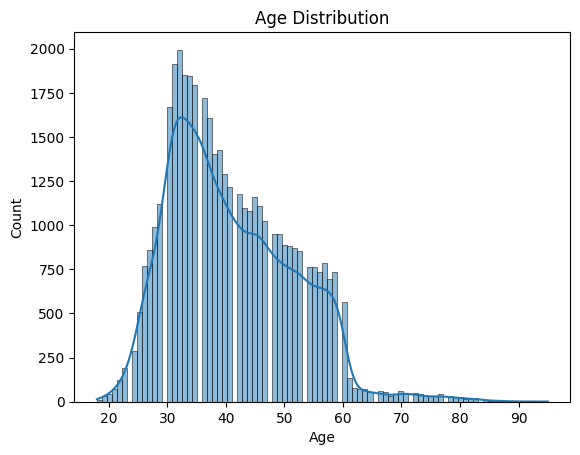

mean:  40.924425508137176 , median:  39.0 , range:  77.0


In [10]:
visualize_numerical_feature('Age')

### Balance Histogram

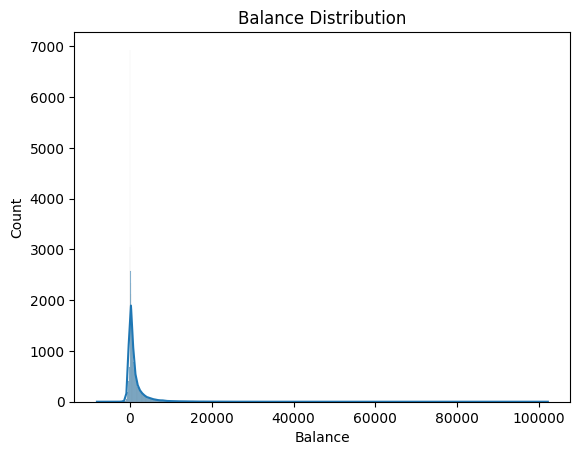

mean:  1362.2720576850766 , median:  448.0 , range:  110146


In [11]:
visualize_numerical_feature('Balance')

### Pdays Histogram

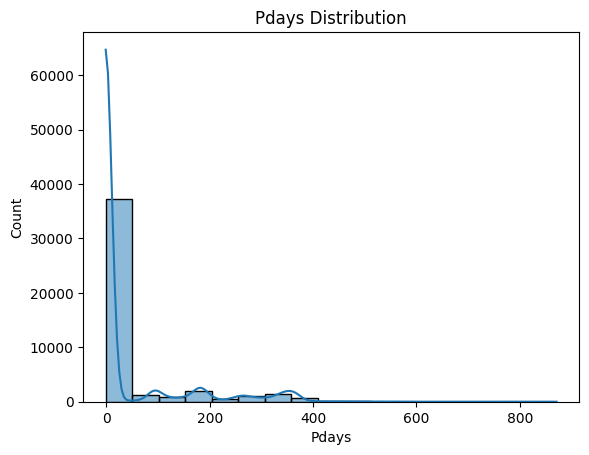

mean:  40.19782796222158 , median:  -1.0 , range:  872


In [12]:
visualize_numerical_feature('Pdays')

## Visualizing Categorical Attributes - Bar Plots 

In [1]:
def visualize_categorical_feature(feature):
    print(freeLancerData[feature].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(data=freeLancerData, x=feature)
    plt.title(f"Frequency of {feature}")
    plt.show()

### Job Bar Plot

Job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
housemaid        1240
student           938
Name: count, dtype: int64


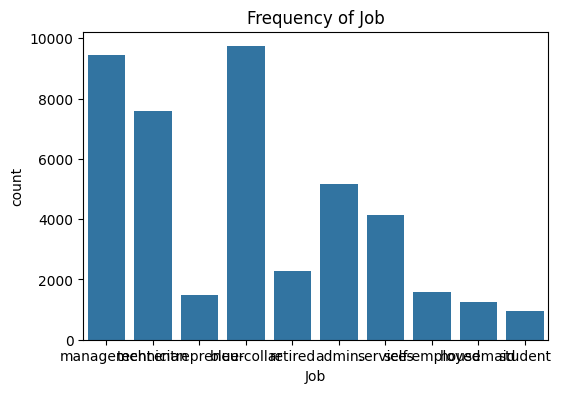

In [14]:
visualize_categorical_feature('Job')

### Marital Bar Plot

Marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


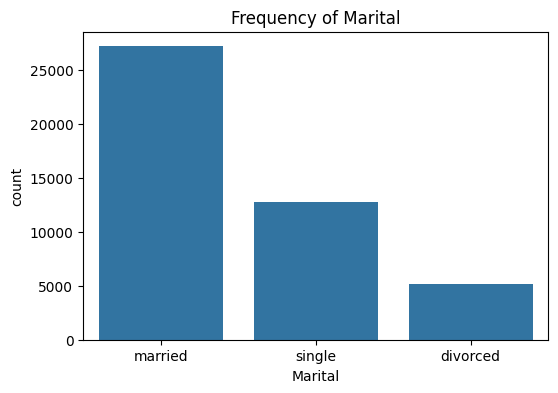

In [15]:
visualize_categorical_feature('Marital')

### Education Bar Plot

Education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64


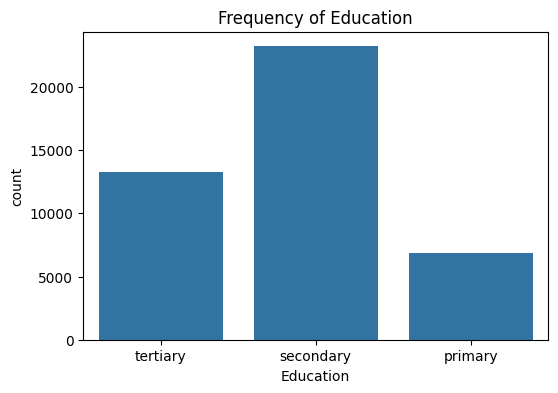

In [16]:
visualize_categorical_feature('Education')

### Default Bar Plot

Default
no     43509
yes      815
Name: count, dtype: int64


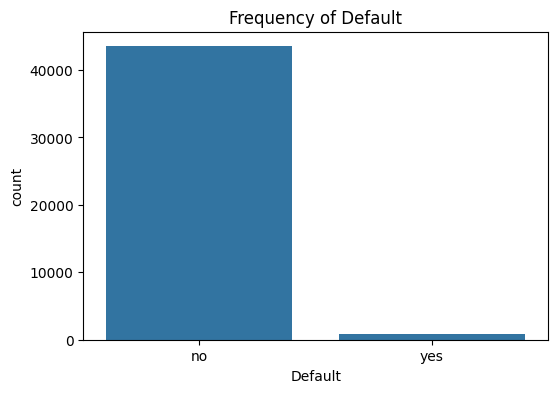

In [17]:
visualize_categorical_feature('Default')

### Housing Bar Plot

Housing
yes    25130
no     20081
Name: count, dtype: int64


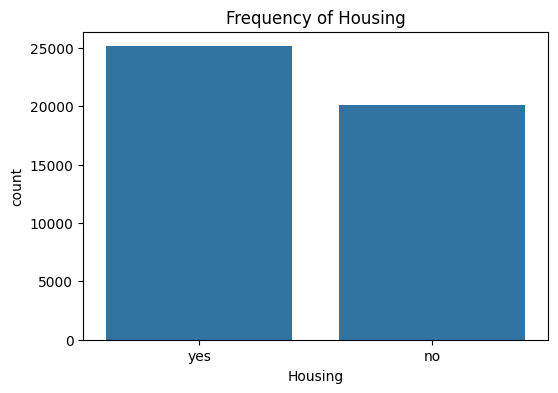

In [18]:
visualize_categorical_feature('Housing')

### Loan Bar Plot

Loan
no     37967
yes     7244
Name: count, dtype: int64


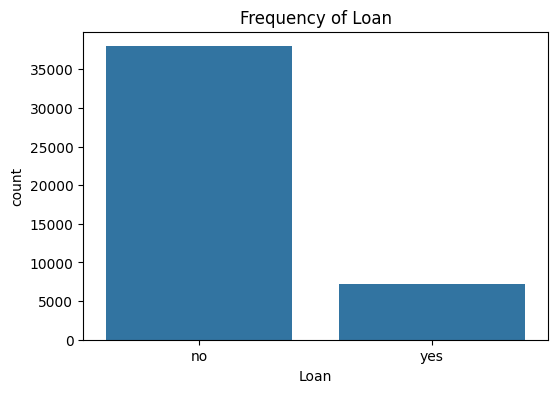

In [19]:
visualize_categorical_feature('Loan')

### Contact Bar Plot

Contact
cellular     41285
telephone     2906
Name: count, dtype: int64


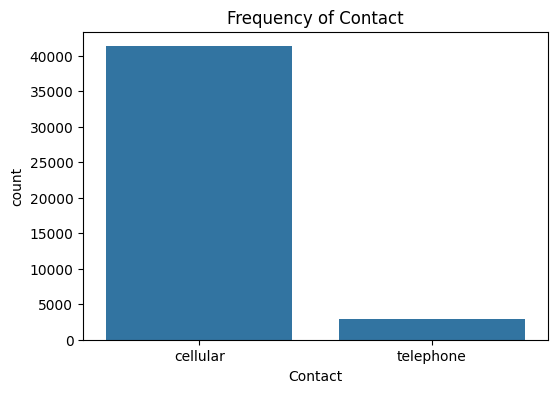

In [20]:
visualize_categorical_feature('Contact')

### Poutcome Bar Plot

Poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64


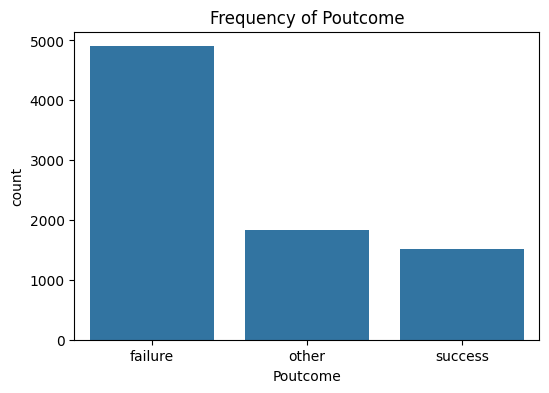

In [21]:
visualize_categorical_feature('Poutcome')

### Outcome Bar Plot

Outcome
no     39922
yes     5289
Name: count, dtype: int64


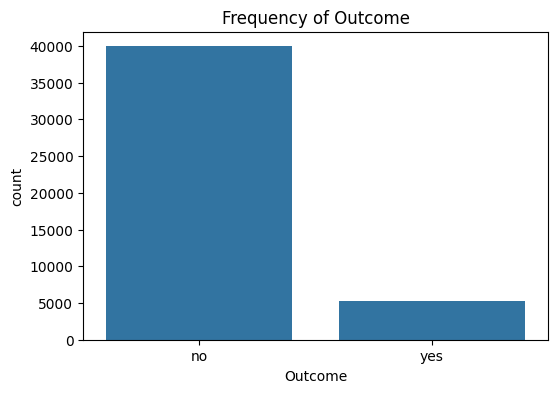

In [22]:
visualize_categorical_feature('Outcome')

Imputation of Missing Values

## Exploring Missing Data

In [9]:
missing_data = freeLancerData.isnull().sum()

print(missing_data)

Job Title                   2
Job_URL                     1
EX_level_demand          7015
Time_Limitation         40916
Search_Keyword              1
Posted_from                37
Description                 2
Category1_URL_search      445
Category_1                445
highlight               13819
Category2_URL_search     4061
Category_2               4061
Category3_URL_search     8953
Category_3               8953
Category4_URL_search    16407
Category_4              16407
Category5_URL_search    24372
Category_5              24372
Category6_URL_search    32643
Category_6              32643
Category7_URL_search    38758
Category_7              38758
Category8_URL_search    43514
Category_8              43514
Category9_URL_search    47469
Category_9              47469
Applicants_Num              1
Payment_Situation           1
Enterprise_Client       63897
Freelancers_Num             0
Spent($)                 1646
Client_Country            125
Connects_Num                1
New_Connec

In [10]:
# Display how much data is missing in % for each feature
missing_percentage = (missing_data / len(freeLancerData)) * 100
print(missing_percentage)

Job Title                0.003127
Job_URL                  0.001564
EX_level_demand         10.969507
Time_Limitation         63.981235
Search_Keyword           0.001564
Posted_from              0.057858
Description              0.003127
Category1_URL_search     0.695856
Category_1               0.695856
highlight               21.609070
Category2_URL_search     6.350274
Category_2               6.350274
Category3_URL_search    14.000000
Category_3              14.000000
Category4_URL_search    25.655981
Category_4              25.655981
Category5_URL_search    38.111024
Category_5              38.111024
Category6_URL_search    51.044566
Category_6              51.044566
Category7_URL_search    60.606724
Category_7              60.606724
Category8_URL_search    68.043784
Category_8              68.043784
Category9_URL_search    74.228303
Category_9              74.228303
Applicants_Num           0.001564
Payment_Situation        0.001564
Enterprise_Client       99.917123
Freelancers_Nu

## Imputing Numerical Attributes

### Imputing Age

In [3]:
# Check for missing values in the 'Age' column
missing_age = bankMarketing['Age'].isnull().sum()
print(f"Missing values in 'Age': {missing_age}")

Missing values in 'Age': 2260


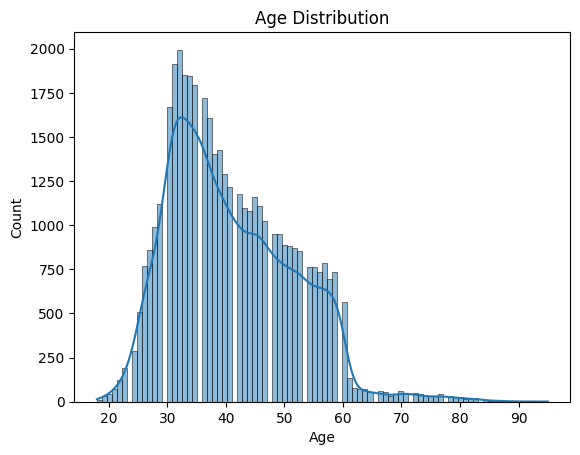

mean:  40.924425508137176 , median:  39.0 , range:  77.0


In [26]:
# Visualize the distribution of Age before Imputation
visualize_numerical_feature('Age')

In [4]:
# Impute missing Age values with the median
imputer_median = SimpleImputer(strategy='median')
bankMarketing['Age'] = imputer_median.fit_transform(bankMarketing[['Age']])

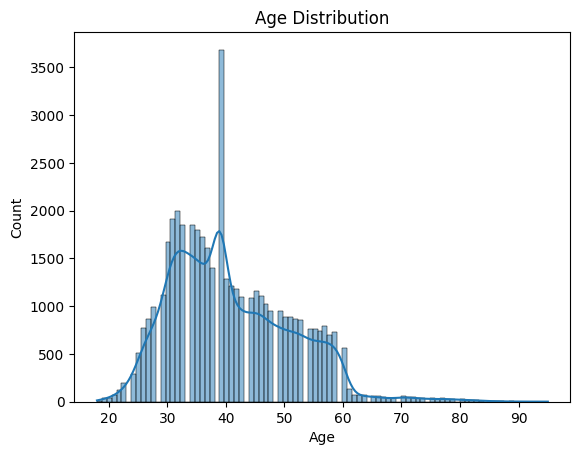

mean:  40.828227643715024 , median:  39.0 , range:  77.0


In [28]:
#Visualize Age after Imputation 
visualize_numerical_feature('Age')

In [29]:
# Check for missing values in the 'Age' column
missing_age = bankMarketing['Age'].isnull().sum()
print(f"Missing values in 'Age': {missing_age}")

Missing values in 'Age': 0


### Imputing Balance & Pdays

## Imputing Categorical Attributes

### Nominal Attributes - Imputation

In [5]:
# List of nominal attributes
nominal_attributes = ['Job','Default', 'Contact']

#Impute missing values with 'Unknown' for each nominal attribute in the list
for attribute in nominal_attributes:
    bankMarketing.loc[:, attribute] = bankMarketing[attribute].fillna('Unknown')


### Ordinal Attributes - Imputation

In [6]:
imputer = SimpleImputer(strategy='most_frequent')

bankMarketing['Education'] = imputer.fit_transform(bankMarketing[['Education']]).ravel()

### Dropping Poutcome

In [7]:
bankMarketing.drop('Poutcome', axis=1, inplace=True)

In [8]:
bankMarketing.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Pdays,Outcome
0,58.0,management,married,tertiary,no,2143,yes,no,cellular,-1,no
1,44.0,technician,single,secondary,no,29,yes,no,cellular,-1,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,cellular,-1,no
3,47.0,blue-collar,married,secondary,no,1506,yes,no,cellular,-1,no
4,39.0,Unknown,single,secondary,no,1,no,no,cellular,-1,no


### Imputing Marital, Housing, Loan, and Outcome 

## Summary Report

# Correlation Calculation

## Numerical Pairs

In [34]:
# Selecting the numerical features
numerical_features = ['Age', 'Balance', 'Pdays']

In [35]:
# Calculate the Pearson correlation for numerical features
numerical_correlation = bankMarketing[numerical_features].corr(method='pearson')

In [36]:
# Display the correlation matrix
print("Pearson Correlation Matrix (Numerical Features):")
print(numerical_correlation)

Pearson Correlation Matrix (Numerical Features):
              Age   Balance     Pdays
Age      1.000000  0.096435 -0.023974
Balance  0.096435  1.000000  0.003435
Pdays   -0.023974  0.003435  1.000000


## Categorical Pairs

In [37]:
# List of categorical features
categorical_features = ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact','Outcome']

In [38]:
# Create an empty DataFrame to store Chi-Square results
chi_square_results = pd.DataFrame(index=categorical_features, columns=categorical_features)
p_value_results = pd.DataFrame(index=categorical_features, columns=categorical_features)
dof_results = pd.DataFrame(index=categorical_features, columns=categorical_features)

In [39]:
# Calculating Chi-Square, p-value, and degrees of freedom for each pair of categorical features
for cat1 in categorical_features:
    for cat2 in categorical_features:
        if cat1 != cat2:
            # Creating contingency table
            contingency_table = pd.crosstab(bankMarketing[cat1], bankMarketing[cat2])
            
            # Performing Chi-Square test
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            
            # Storing the results in the DataFrames
            chi_square_results.loc[cat1, cat2] = chi2
            p_value_results.loc[cat1, cat2] = p
            dof_results.loc[cat1, cat2] = dof

In [40]:
# Display the Chi-Square values
print("Chi-Square Correlation Matrix (Categorical Features):")
print(chi_square_results)

# Display the p-values
print("\nP-Value Matrix (Categorical Features):")
print(p_value_results)

# Display the degrees of freedom
print("\nDegrees of Freedom Matrix (Categorical Features):")
print(dof_results)

Chi-Square Correlation Matrix (Categorical Features):
                    Job      Marital     Education     Default      Housing  \
Job                 NaN  3814.537255  26551.681776   66.897708  3486.914424   
Marital     3814.537255          NaN   1321.005219   16.982251     19.34482   
Education  26551.681776  1321.005219           NaN   12.666221   457.802019   
Default       66.897708    16.982251     12.666221         NaN      6.23208   
Housing     3486.914424     19.34482    457.802019     6.23208          NaN   
Loan         504.278785   121.952535    125.776891  269.807468    76.974808   
Contact      818.326494   114.102893    320.075249   17.675229   407.878235   
Outcome      832.984453   196.495946    223.834823   23.920732   874.822449   

                 Loan     Contact     Outcome  
Job        504.278785  818.326494  832.984453  
Marital    121.952535  114.102893  196.495946  
Education  125.776891  320.075249  223.834823  
Default    269.807468   17.675229   23.920

In [9]:
bankMarketing.drop('Job', axis=1, inplace=True)

# Data Preparation for Modeling

## Encode Categorical Features

### Ordinal & One Hot Encoding

In [10]:
numerical_features = ['Age', 'Balance', 'Pdays'] 
ordinal_features = ['Education'] 
nominal_features = ['Marital', 'Default', 'Housing', 'Loan', 'Contact'] 
target_variable = ['Outcome']  # Target variable

In [11]:
# Separating the features
numerical_data = bankMarketing[numerical_features]
ordinal_data = bankMarketing[ordinal_features]
nominal_data = bankMarketing[nominal_features]
target_data = bankMarketing[target_variable]

In [12]:
# Ordinal encoding to ordinal features
# Order of categories for the 'Education' feature
education_order = ['primary', 'secondary', 'tertiary']

ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Applying ordinal encoding to the 'Education' feature
ordinal_data = ordinal_encoder.fit_transform(ordinal_data)
# Convert back to DataFrame and assign column names
ordinal_data = pd.DataFrame(ordinal_data, columns=ordinal_features)

In [13]:
# Applying one-hot encoding to the nominal features
encoded_nominal_data = pd.get_dummies(nominal_data, drop_first=True)

# Concatenate numerical data, encoded ordinal data, encoded nominal data, and target variable back together
bankMarketing_encoded = pd.concat([numerical_data, ordinal_data, encoded_nominal_data, target_data], axis=1)

### Dataset After Encoding

In [14]:
# Verify the encoding
print(bankMarketing_encoded.head())

    Age  Balance  Pdays  Education  Marital_married  Marital_single  \
0  58.0     2143     -1        3.0             True           False   
1  44.0       29     -1        2.0            False            True   
2  33.0        2     -1        2.0             True           False   
3  47.0     1506     -1        2.0             True           False   
4  39.0        1     -1        2.0            False            True   

   Default_no  Default_yes  Housing_yes  Loan_yes  Contact_cellular  \
0        True        False         True     False              True   
1        True        False         True     False              True   
2        True        False         True      True              True   
3        True        False         True     False              True   
4        True        False        False     False              True   

   Contact_telephone Outcome  
0              False      no  
1              False      no  
2              False      no  
3              False  

## Scale Numerical Features

In [15]:
numerical_features = ['Age', 'Balance', 'Pdays']

In [16]:
scaler = StandardScaler()
bankMarketing_encoded[numerical_features] = scaler.fit_transform(bankMarketing_encoded[numerical_features])

In [17]:
bankMarketing_encoded.head()

,Age,Balance,Pdays,Education,Marital_married,Marital_single,Default_no,Default_yes,Housing_yes,Loan_yes,Contact_cellular,Contact_telephone,Outcome
0,1.656928,0.256419,-0.411453,3.0,True,False,True,False,True,False,True,False,no
1,0.306049,-0.437895,-0.411453,2.0,False,True,True,False,True,False,True,False,no
2,-0.755356,-0.446762,-0.411453,2.0,True,False,True,False,True,True,True,False,no
3,0.595523,0.047205,-0.411453,2.0,True,False,True,False,True,False,True,False,no
4,-0.176408,-0.447091,-0.411453,2.0,False,True,True,False,False,False,True,False,no


# Final Dataset and Dimension

In [20]:
# Print the final dataset
print("Final Dataset:")
bankMarketing_encoded.head()

Final Dataset:


,Age,Balance,Pdays,Education,Marital_married,Marital_single,Default_no,Default_yes,Housing_yes,Loan_yes,Contact_cellular,Contact_telephone,Outcome
0,1.656928,0.256419,-0.411453,3.0,True,False,True,False,True,False,True,False,no
1,0.306049,-0.437895,-0.411453,2.0,False,True,True,False,True,False,True,False,no
2,-0.755356,-0.446762,-0.411453,2.0,True,False,True,False,True,True,True,False,no
3,0.595523,0.047205,-0.411453,2.0,True,False,True,False,True,False,True,False,no
4,-0.176408,-0.447091,-0.411453,2.0,False,True,True,False,False,False,True,False,no


In [21]:
# Print the dimensions of the final dataset
print("\nDimensions of the final dataset (rows, columns):")
print(bankMarketing_encoded.shape)


Dimensions of the final dataset (rows, columns):
(45211, 13)
